In [ ]:
!pip install ruptures

     |████████████████████████████████| 918 kB 7.8 MB/s 


In [ ]:
!pip install changefinder

     |████████████████████████████████| 154 kB 10.7 MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-py3-none-any.whl size=3841 sha256=80cd070d8b26405cd493bd698347a12c907cd15ef111ded4757bc90b662c551f
  Stored in directory: /root/.cache/pip/wheels/48/8f/4c/ba040e4cad3dbf0409c5c38ac9d3f92f947ea490412cdf3400
Successfully built changefinder


In [ ]:
!pip install bayesian-changepoint-detection

  Created wheel for bayesian-changepoint-detection: filename=bayesian_changepoint_detection-0.2.dev1-py3-none-any.whl size=6155 sha256=0606d2e9d996e9a129b0b9e31f0066ac9b732ae403e496e78fbc158ebdbbb85a
  Stored in directory: /root/.cache/pip/wheels/cd/37/cc/85af7f424fdf03cb03cc2f296301549b54e9ff9a5dc7df0a5e
Successfully built bayesian-changepoint-detection


In [ ]:
!pip install bocd

  Created wheel for bocd: filename=bocd-0.1.2-py3-none-any.whl size=5358 sha256=5ef8f80a4ab626b021e061eacfdf73be24210bff7da672d0036064f9cdb6cb6a
  Stored in directory: /root/.cache/pip/wheels/b6/37/57/b667aaa57a48e32a68615c5f136fe2af2d1d64f3d013ea2b4c
Successfully built bocd


In [ ]:
!pip install pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-py3-none-any.whl size=16154 sha256=fd2e615513a5fe3deb3c948d715d27b78a0e5e70234f3fbad48c70653972fe2e
  Stored in directory: /root/.cache/pip/wheels/94/c2/70/5608feb79056cccbe70cbc3a6d48345479bdea4adf303dff12
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=eb5776aae8e2200c11a46eb59dabb4b58d6f3b50a081c4225b6c5e653c0897ac
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pwlf pyDOE


In [ ]:
'''

SELECT del_fact.material      AS item
     , del_fact.sold_to_party AS sold_to
     --, data_fact.profit_center
     , del_fact.sales_organization AS sales_org
     , CASE
           WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
           ELSE del_fact.distribution_channel
       END AS distribution_channel
     --, del_fact.actual_goods_issue_date AS day
     , cal.fscl_wk_end_dt
     , del_fact.plant AS location
     , prod_hier.category
     , SUM(del_fact.delivery_quantity) AS delivery_quantity
     , SUM(del_fact.gross_weight) AS total_gross_weight
     , SUM(del_fact.net_weight) AS total_net_weight

FROM       PROD_KHC_LOGISTICS.transportation.sap_cat_delivery_fact del_fact
INNER JOIN "PROD_KHC_MASTER_DATA"."CALENDARS"."KHC_FISCAL_CALENDAR_DIM"            cal
ON         cal.cal_dt_int = del_fact.actual_goods_issue_date

INNER JOIN PROD_KHC_LOGISTICS.ORDER_MANAGEMENT.sap_cat_sales_document_item_data_fact data_fact 
ON         (del_fact.sales_document = data_fact.sales_document 
            AND 
            del_fact.order_item = data_fact.order_item 
            AND 
            data_fact.sales_doc_type IN ('ZAFX','ZEXP','ZOR','ZORX')
           )

INNER JOIN PROD_khc_master_data.product.sap_cat_product_material_master_dim mat_master 
ON         del_fact.material = mat_master.material 
AND        mat_master.MATL_TYPE = 'Z001'

INNER JOIN PROD_khc_master_data.product.SAP_CAT_PRODUCT_HIERARCHY_DIM prod_hier
ON         mat_master.prod_hier = prod_hier.prod_hier

LEFT JOIN   "PROD_KHC_MASTER_DATA"."CUSTOMER"."SAP_CAT_CUSTOMER_HIERARCHY_DIM" hier_dim
ON           del_fact.sales_organization = hier_dim.salesorg 
AND          CASE WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30' ELSE del_fact.distribution_channel END = hier_dim.distr_chan 
and          del_fact.sold_to_party = hier_dim.customer 

WHERE       ((
             del_fact.SALES_ORGANIZATION IN ('US01','CA01','PR01') 
             AND 
             del_fact.DISTRIBUTION_CHANNEL IN ('20','30','50')
             )
             OR 
             (del_fact.sales_organization = 'US13' 
              AND 
              del_fact.distribution_channel IN ('10','20')
             )
            )
AND         LOWER(hier_dim.customer_desc) LIKE '%publix%'           
AND         TRY_TO_NUMERIC(prod_hier.category) IN (25) 

GROUP BY  del_fact.material      
        , del_fact.sold_to_party 
        --, data_fact.profit_center
        , del_fact.sales_organization 
        , CASE
             WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
             ELSE del_fact.distribution_channel
          END
        --, del_fact.actual_goods_issue_date AS day
        , cal.fscl_wk_end_dt
        , del_fact.plant 
        , prod_hier.category
'''

'\n\nSELECT del_fact.material      AS item\n     , del_fact.sold_to_party AS sold_to\n     --, data_fact.profit_center\n     , del_fact.sales_organization AS sales_org\n     , CASE\n           WHEN del_fact.sales_organization=\'CA01\' AND mat_master.division = \'70\' AND del_fact.distribution_channel = \'20\' THEN \'30\'\n           ELSE del_fact.distribution_channel\n       END AS distribution_channel\n     --, del_fact.actual_goods_issue_date AS day\n     , cal.fscl_wk_end_dt\n     , del_fact.plant AS location\n     , prod_hier.category\n     , SUM(del_fact.delivery_quantity) AS delivery_quantity\n     , SUM(del_fact.gross_weight) AS total_gross_weight\n     , SUM(del_fact.net_weight) AS total_net_weight\n\nFROM       PROD_KHC_LOGISTICS.transportation.sap_cat_delivery_fact del_fact\nINNER JOIN "PROD_KHC_MASTER_DATA"."CALENDARS"."KHC_FISCAL_CALENDAR_DIM"            cal\nON         cal.cal_dt_int = del_fact.actual_goods_issue_date\n\nINNER JOIN PROD_KHC_LOGISTICS.ORDER_MANAGEMENT.sap_c

In [ ]:
'''

SELECT del_fact.material      AS item
     , del_fact.sold_to_party AS sold_to
     --, data_fact.profit_center
     , del_fact.sales_organization AS sales_org
     , CASE
           WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
           ELSE del_fact.distribution_channel
       END AS distribution_channel
     --, del_fact.actual_goods_issue_date AS day
     , cal.fscl_wk_end_dt
     , del_fact.plant AS location
     , prod_hier.category
     , SUM(del_fact.delivery_quantity) AS delivery_quantity
     , SUM(del_fact.gross_weight) AS total_gross_weight
     , SUM(del_fact.net_weight) AS total_net_weight

FROM       PROD_KHC_LOGISTICS.transportation.sap_cat_delivery_fact del_fact
INNER JOIN "PROD_KHC_MASTER_DATA"."CALENDARS"."KHC_FISCAL_CALENDAR_DIM"            cal
ON         cal.cal_dt_int = del_fact.actual_goods_issue_date

INNER JOIN PROD_KHC_LOGISTICS.ORDER_MANAGEMENT.sap_cat_sales_document_item_data_fact data_fact 
ON         (del_fact.sales_document = data_fact.sales_document 
            AND 
            del_fact.order_item = data_fact.order_item 
            AND 
            data_fact.sales_doc_type IN ('ZAFX','ZEXP','ZOR','ZORX')
           )

INNER JOIN PROD_khc_master_data.product.sap_cat_product_material_master_dim mat_master 
ON         del_fact.material = mat_master.material 
AND        mat_master.MATL_TYPE = 'Z001'

INNER JOIN PROD_khc_master_data.product.SAP_CAT_PRODUCT_HIERARCHY_DIM prod_hier
ON         mat_master.prod_hier = prod_hier.prod_hier

LEFT JOIN   "PROD_KHC_MASTER_DATA"."CUSTOMER"."SAP_CAT_CUSTOMER_HIERARCHY_DIM" hier_dim
ON           del_fact.sales_organization = hier_dim.salesorg 
AND          CASE WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30' ELSE del_fact.distribution_channel END = hier_dim.distr_chan 
and          del_fact.sold_to_party = hier_dim.customer 

WHERE       ((
             del_fact.SALES_ORGANIZATION IN ('US01','CA01','PR01') 
             AND 
             del_fact.DISTRIBUTION_CHANNEL IN ('20','30','50')
             )
             OR 
             (del_fact.sales_organization = 'US13' 
              AND 
              del_fact.distribution_channel IN ('10','20')
             )
            )
AND         LOWER(hier_dim.customer_desc) LIKE '%wal%mart%'           
--AND         TRY_TO_NUMERIC(prod_hier.category) IN (25) 
AND         del_fact.material = '000000210006116100'

GROUP BY  del_fact.material      
        , del_fact.sold_to_party 
        --, data_fact.profit_center
        , del_fact.sales_organization 
        , CASE
             WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
             ELSE del_fact.distribution_channel
          END
        --, del_fact.actual_goods_issue_date AS day
        , cal.fscl_wk_end_dt
        , del_fact.plant 
        , prod_hier.category
ORDER BY 5 DESC, 2        
;        
'''

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
pd.options.display.float_format = "{:.18f}".format
plt.show( block=False )

In [ ]:
df = pd.read_csv("publix_cc_shipment.csv")
df.columns = [c.lower() for c in df.columns]
df['fscl_wk_end_dt'] = pd.to_datetime(df['fscl_wk_end_dt'])
df['shipment_date'] = df['fscl_wk_end_dt']
df

,item,sold_to,sales_org,distribution_channel,fscl_wk_end_dt,location,category,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
0,210000001400,200018996,US01,20,2017-11-18,5688,25,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
1,210000001400,200250804,US01,20,2017-11-18,5688,25,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
2,210000001400,100029534,US01,20,2017-11-18,5688,25,360.000000000000000000,2668.679999999999836291,2160.000000000000000000,2017-11-18
3,210000001400,200055072,US01,20,2017-11-18,5688,25,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
4,210000002800,200055072,US01,20,2017-11-18,5688,25,180.000000000000000000,1224.000000000000000000,1080.000000000000000000,2017-11-18
...,...,...,...,...,...,...,...,...,...,...,...
23216,210006122300,100029534,US01,20,2021-08-21,5688,25,240.000000000000000000,4659.600000000000363798,4320.000000000000000000,2021-08-21
23217,210006122300,200055072,US01,20,2021-08-21,5688,25,120.000000000000000000,2329.800000000000181899,2160.000000000000000000,2021-08-21
23218,210006122300,200250804,US01,20,2021-08-21,5688,25,120.000000000000000000,2329.800000000000181899,2160.000000000000000000,2021-08-21
23219,210006198700,200250804,US01,20,2021-08-21,5688,25,360.000000000000000000,2361.239999999999781721,2023.200000000000045475,2021-08-21


In [ ]:
df.sales_org.drop_duplicates()

0    US01
Name: sales_org, dtype: object

In [ ]:
df.distribution_channel.drop_duplicates()

0    20
Name: distribution_channel, dtype: int64

In [ ]:
df.category.drop_duplicates()

0    25
Name: category, dtype: int64

In [ ]:
df.location.drop_duplicates()

0        5688
552      7531
7883     5684
19745    5418
Name: location, dtype: int64

In [ ]:
df.sold_to.drop_duplicates()

0    200018996
1    200250804
2    100029534
3    200055072
8    200034712
Name: sold_to, dtype: int64

In [ ]:
df.item.drop_duplicates()

0        210000001400
4        210000002800
6        210000072700
8        210000072800
10       210000072900
14       210000073100
17       210000073200
18       210000073300
19       210000073400
24       210000074400
26       210000075300
27       210000075400
28       210000081800
31       210000402400
36       210000458300
39       210000496800
43       210000496900
47       210000623400
52       210000623500
57       210000623600
62       210000649100
66       210003002800
70       210006008500
75       210006121800
77       210006122300
80       210006124300
85       210006168800
90       210006198400
95       210006198700
97       210006231600
114      210000073000
638      210000075500
1152     210000075200
1690     210003002810
1834     210006122310
3593     210000685800
5417     210000692700
5421     210000692800
5425     210000692900
5785     210006138500
10033    210000090800
10038    210000090900
10048    210000404000
16408    210000074500
22161    210000804200
Name: item

In [ ]:
df.drop(columns=['sales_org', 'category', 'distribution_channel'], inplace=True)

In [ ]:
df.head()

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
0,210000001400,200018996,2017-11-18,5688,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
1,210000001400,200250804,2017-11-18,5688,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
2,210000001400,100029534,2017-11-18,5688,360.000000000000000000,2668.679999999999836291,2160.000000000000000000,2017-11-18
3,210000001400,200055072,2017-11-18,5688,180.000000000000000000,1334.339999999999918145,1080.000000000000000000,2017-11-18
4,210000002800,200055072,2017-11-18,5688,180.000000000000000000,1224.000000000000000000,1080.000000000000000000,2017-11-18


In [ ]:
shipment_agg_df = df.groupby(['item','sold_to','location']).agg({'delivery_quantity': ['sum'], 'total_net_weight': ['sum'], 'shipment_date': ['min'], 'fscl_wk_end_dt': ['max']}).reset_index()
shipment_agg_df.columns = ['item','sold_to','location','delivery_quantity_agg','net_weight_agg', 'min_shipment_week', 'max_shipment_week']
shipment_agg_df

,item,sold_to,location,delivery_quantity_agg,net_weight_agg,min_shipment_week,max_shipment_week
0,210000001400,100029534,5688,109986.000000000000000000,659916.000000000000000000,2017-11-18,2021-08-21
1,210000001400,100029534,7531,12960.000000000000000000,77760.000000000000000000,2018-11-10,2020-11-07
2,210000001400,200018996,5688,83309.000000000000000000,499854.000000000000000000,2017-11-18,2021-08-21
3,210000001400,200018996,7531,7740.000000000000000000,46440.000000000000000000,2018-11-10,2019-12-07
4,210000001400,200034712,5688,149261.000000000000000000,895566.000000000000000000,2017-11-25,2021-08-21
...,...,...,...,...,...,...,...
245,210006231600,100029534,5688,3662.000000000000000000,33361.054000000018277206,2017-11-18,2021-08-21
246,210006231600,200018996,5688,3608.000000000000000000,32869.030000000013387762,2020-06-20,2021-07-24
247,210006231600,200034712,5688,4571.000000000000000000,41642.006000000008498318,2017-11-18,2021-07-03
248,210006231600,200055072,5688,3348.000000000000000000,30500.564000000013038516,2017-11-25,2021-07-17


In [ ]:
shipment_location_duplicate_chk_df = df[['item','sold_to','location']].drop_duplicates().groupby(['item', 'sold_to']).nunique().reset_index()
shipment_location_duplicate_chk_df.columns = ['item','sold_to', 'location_count']
shipment_location_duplicate_chk_df[shipment_location_duplicate_chk_df.location_count > 1].sort_values(by=['item','sold_to'])

,item,sold_to,location_count
0,210000001400,100029534,2
1,210000001400,200018996,2
2,210000001400,200034712,2
3,210000001400,200055072,2
4,210000001400,200250804,2
5,210000002800,100029534,2
6,210000002800,200018996,2
7,210000002800,200034712,2
8,210000002800,200055072,2
9,210000002800,200250804,2


In [ ]:
split_location_df = shipment_location_duplicate_chk_df[shipment_location_duplicate_chk_df.location_count > 1].sort_values(by=['item','sold_to'])
split_location_df.reset_index(inplace=True)
split_location_df.drop(columns=['index'], inplace = True)
split_location_df

,item,sold_to,location_count
0,210000001400,100029534,2
1,210000001400,200018996,2
2,210000001400,200034712,2
3,210000001400,200055072,2
4,210000001400,200250804,2
5,210000002800,100029534,2
6,210000002800,200018996,2
7,210000002800,200034712,2
8,210000002800,200055072,2
9,210000002800,200250804,2


In [ ]:
split_location_df.shape

(38, 3)

In [ ]:
split_location_df.columns

Index(['item', 'sold_to', 'location_count'], dtype='object')

In [ ]:
split_location_df[(split_location_df.item==210000496900)]

,item,sold_to,location_count
26,210000496900,200055072,2


In [ ]:
df[(df.item==210000496900) & (df.sold_to==200055072)]['location'].drop_duplicates()

44      5688
7883    5684
Name: location, dtype: int64

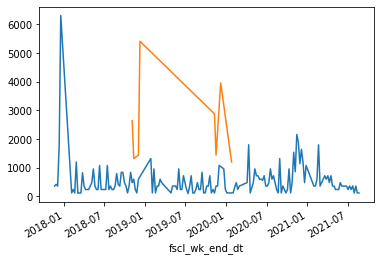

In [ ]:
#df[(df.item==210006122300) & (df.sold_to==100029534)]['location']#.drop_duplicates()#.set_index('fscl_wk_end_dt', inplace=True)
'''
210000073300 100029534
[5688, 7531]
'''
temp_df_1 = df[(df.item==210006122300) & (df.sold_to==200055072) & (df.location==5688)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210006122300) & (df.sold_to==200055072) & (df.location==7531)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot()
temp_df_2.delivery_quantity.plot()

In [ ]:
temp_df_2

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2018-11-03,210006122300,200055072,7531,2640.000000000000000000,51255.599999999998544808,47520.000000000000000000,2018-11-03
2018-11-10,210006122300,200055072,7531,1320.000000000000000000,25627.799999999999272404,23760.000000000000000000,2018-11-10
2018-12-01,210006122300,200055072,7531,1440.000000000000000000,27957.599999999998544808,25920.000000000000000000,2018-12-01
2018-12-08,210006122300,200055072,7531,5412.000000000000000000,105073.979999999995925464,97416.000000000000000000,2018-12-08
2019-11-09,210006122300,200055072,7531,2879.000000000000000000,55895.785000000003492460,51822.000000000000000000,2019-11-09
2019-11-16,210006122300,200055072,7531,1440.000000000000000000,27957.599999999998544808,25920.000000000000000000,2019-11-16
2019-12-07,210006122300,200055072,7531,3960.000000000000000000,76883.399999999994179234,71280.000000000000000000,2019-12-07
2020-01-25,210006122300,200055072,7531,1200.000000000000000000,23298.000000000000000000,21600.000000000000000000,2020-01-25


In [ ]:
temp_df_1[temp_df_1.shipment_date=='2019-02-16']

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,


210000001400 100029534
[5688, 7531]


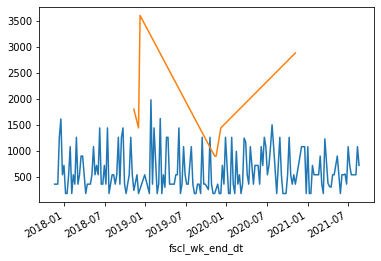

******************************************
210000001400 200018996
[5688, 7531]


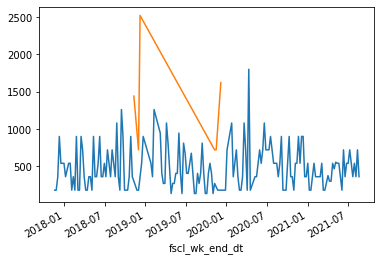

******************************************
210000001400 200034712
[5688, 7531]


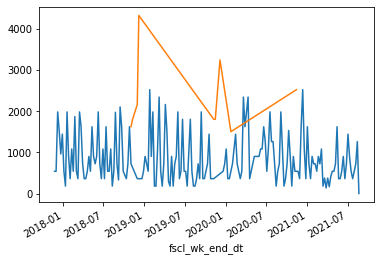

******************************************
210000001400 200055072
[5688, 7531]


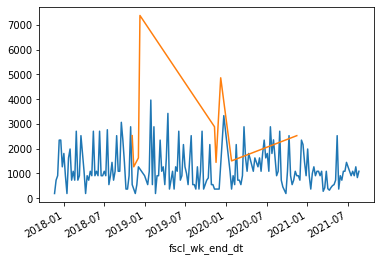

******************************************
210000001400 200250804
[5688, 7531]


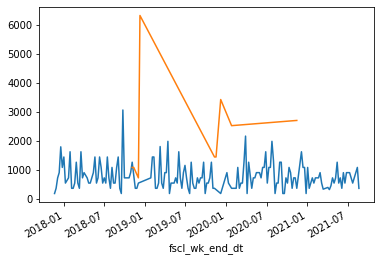

******************************************
210000002800 100029534
[5688, 7531]


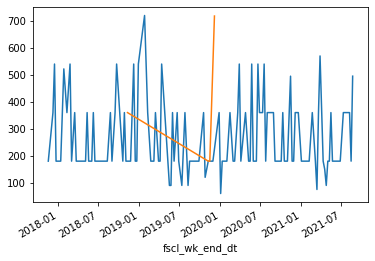

******************************************
210000002800 200018996
[5688, 7531]


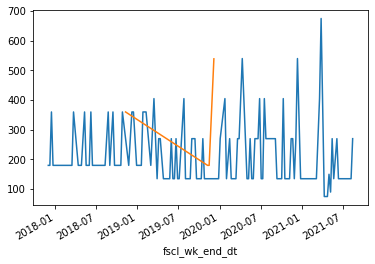

******************************************
210000002800 200034712
[5688, 7531]


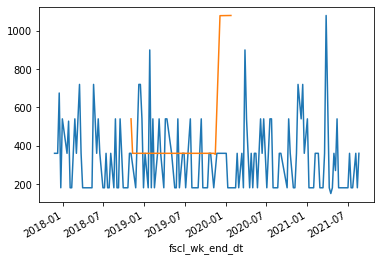

******************************************
210000002800 200055072
[5688, 7531]


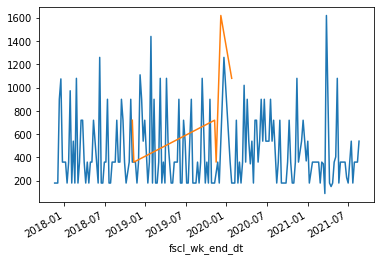

******************************************
210000002800 200250804
[5688, 7531]


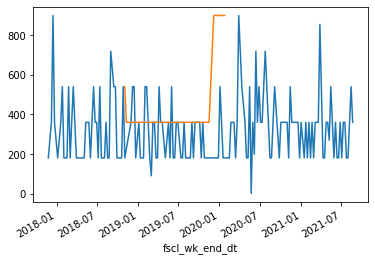

******************************************
210000072800 100029534
[5688, 7531]


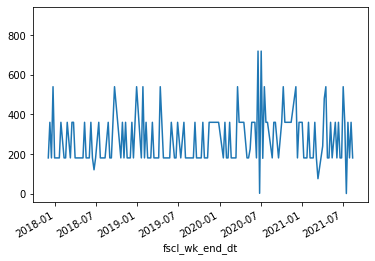

******************************************
210000072800 200034712
[5688, 7531]


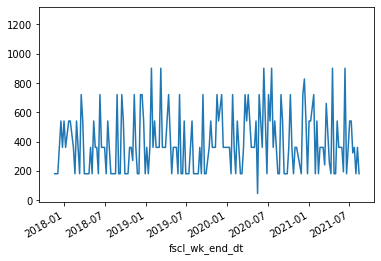

******************************************
210000072800 200055072
[5688, 7531]


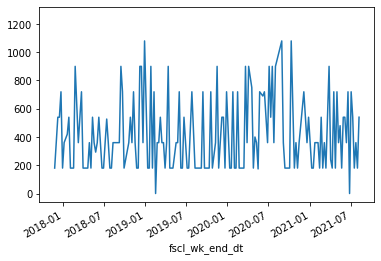

******************************************
210000072800 200250804
[5688, 7531]


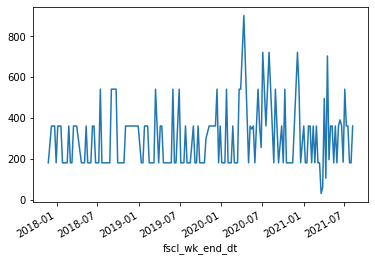

******************************************
210000073000 100029534
[5688, 7531]


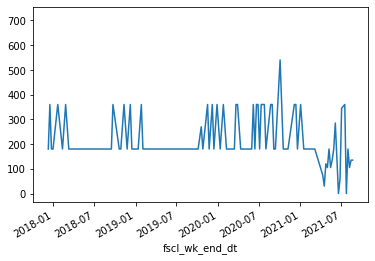

******************************************
210000073000 200034712
[5688, 7531]


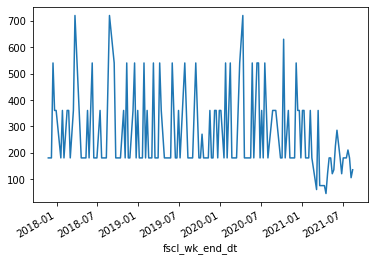

******************************************
210000073000 200055072
[5688, 7531]


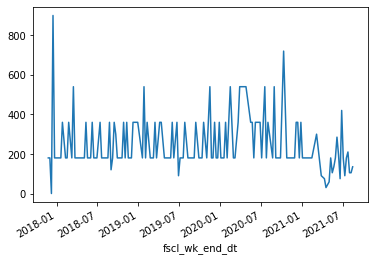

******************************************
210000073000 200250804
[5688, 7531]


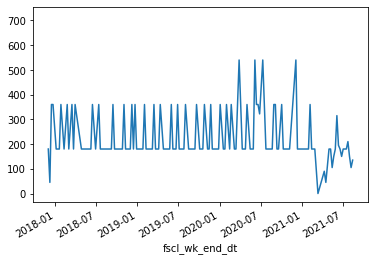

******************************************
210000073300 100029534
[5688, 7531]


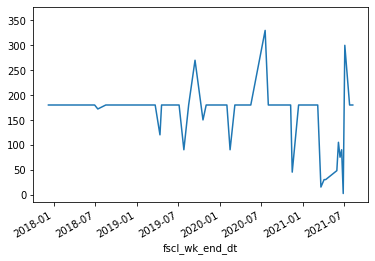

******************************************
210000073300 200034712
[5688, 7531]


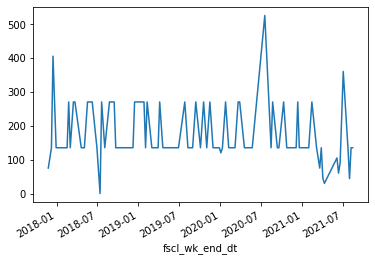

******************************************
210000073300 200055072
[5688, 7531]


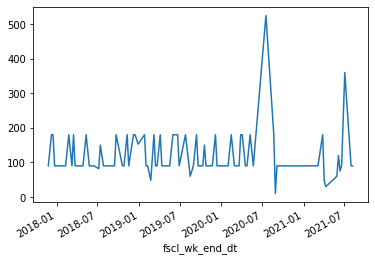

******************************************
210000073300 200250804
[5688, 7531]


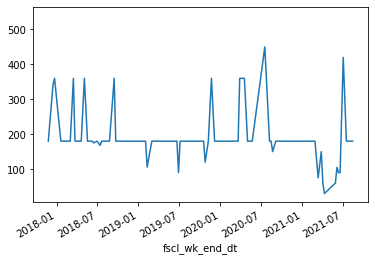

******************************************
210000075400 100029534
[5688, 7531]


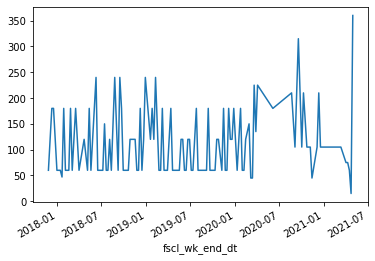

******************************************
210000075400 200034712
[5688, 7531]


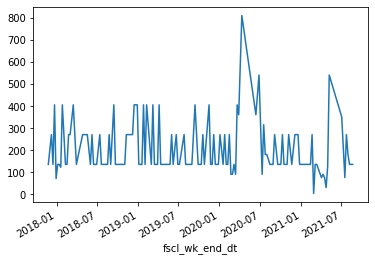

******************************************
210000075400 200055072
[5688, 7531]


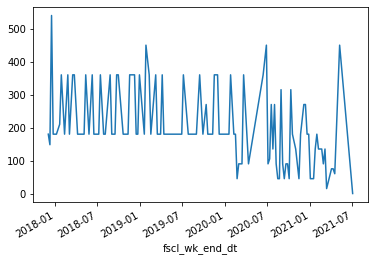

******************************************
210000075400 200250804
[5688, 7531]


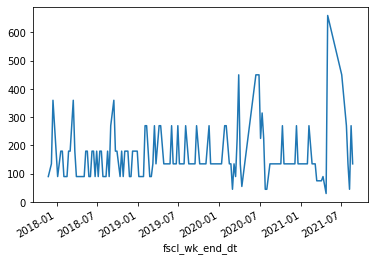

******************************************
210000496900 200055072
[5688, 5684]


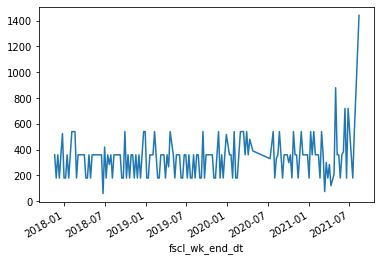

******************************************
210000623500 200055072
[5688, 5684]


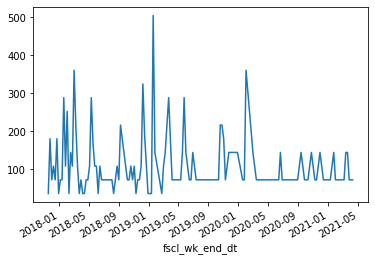

******************************************
210000623600 200250804
[5688, 5418]


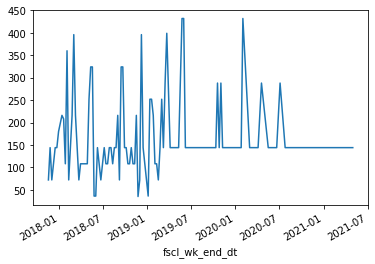

******************************************
210000649100 200055072
[5688, 5684]


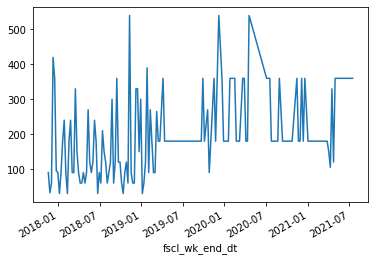

******************************************
210006008500 200055072
[5688, 5684]


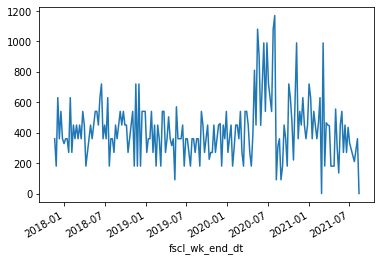

******************************************
210006122300 100029534
[5688, 7531]


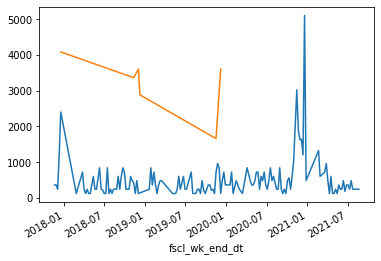

******************************************
210006122300 200018996
[5688, 7531]


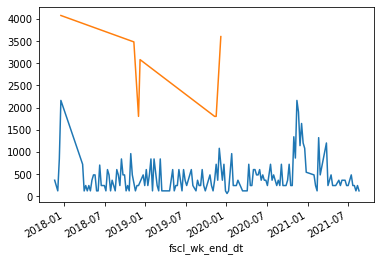

******************************************
210006122300 200034712
[5688, 7531]


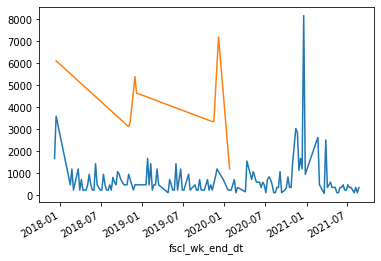

******************************************
210006122300 200055072
[5688, 7531]


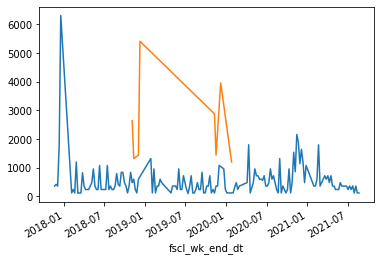

******************************************
210006122300 200250804
[7531, 5688]


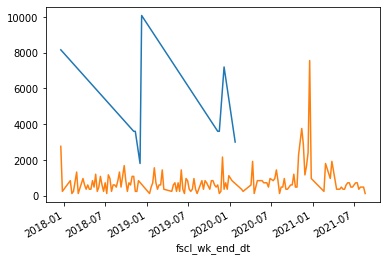

******************************************
210006168800 200055072
[5688, 5684]


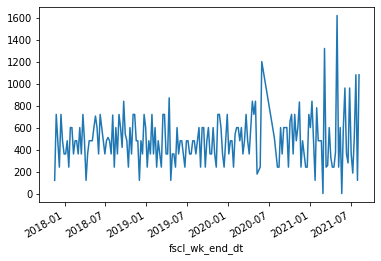

******************************************
210006198700 200055072
[5688, 5684]


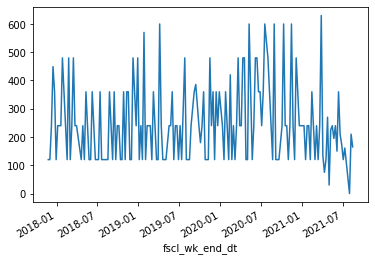

******************************************


In [ ]:
for i in range(len(split_location_df)) :
  print(split_location_df.loc[i, "item"], split_location_df.loc[i, "sold_to"])
  v_item, v_sold_to = split_location_df.loc[i, "item"], split_location_df.loc[i, "sold_to"]
  location_list = list(df[(df.item==v_item) & (df.sold_to==v_sold_to)]['location'].drop_duplicates())
  print(location_list)

  temp_df_1 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[0])]
  temp_df_1.set_index('fscl_wk_end_dt', inplace=True)
  
  temp_df_2 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[1])]
  temp_df_2.set_index('fscl_wk_end_dt', inplace=True)
  temp_df_1.delivery_quantity.plot()
  temp_df_2.delivery_quantity.plot()
  plt.show( block=False )

  print("******************************************")

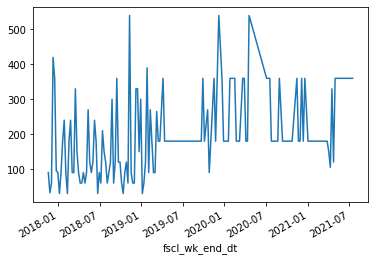

In [ ]:
#df[(df.item==210006122300) & (df.sold_to==100029534)]['location']#.drop_duplicates()#.set_index('fscl_wk_end_dt', inplace=True)
'''
210000649100 200055072
[5688, 5684]
'''
temp_df_1 = df[(df.item==210000649100) & (df.sold_to==200055072) & (df.location==5688)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210000649100) & (df.sold_to==200055072) & (df.location==5684)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot()
temp_df_2.delivery_quantity.plot()

In [ ]:
temp_df_1

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2017-11-18,210000649100,200055072,5688,90.000000000000000000,578.250000000000000000,506.250000000000000000,2017-11-18
2017-11-25,210000649100,200055072,5688,32.000000000000000000,205.599999999999994316,180.000000000000000000,2017-11-25
2017-12-02,210000649100,200055072,5688,60.000000000000000000,385.500000000000000000,337.500000000000000000,2017-12-02
2017-12-09,210000649100,200055072,5688,420.000000000000000000,2698.500000000000000000,2362.500000000000000000,2017-12-09
2017-12-16,210000649100,200055072,5688,360.000000000000000000,2313.000000000000000000,2025.000000000000000000,2017-12-16
...,...,...,...,...,...,...,...
2021-04-17,210000649100,200055072,5688,330.000000000000000000,2118.599999999999909051,1854.599999999999909051,2021-04-17
2021-04-24,210000649100,200055072,5688,120.000000000000000000,770.399999999999977263,674.399999999999977263,2021-04-24
2021-05-01,210000649100,200055072,5688,360.000000000000000000,2311.199999999999818101,2023.200000000000045475,2021-05-01


In [ ]:
temp_df_2

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2019-02-16,210000649100,200055072,5684,120.000000000000000000,771.000000000000000000,675.000000000000000000,2019-02-16


In [ ]:
temp_df_1[temp_df_1.shipment_date=='2019-02-16']

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,


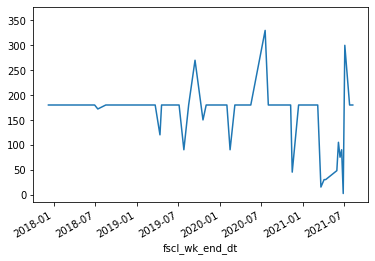

In [ ]:
#df[(df.item==210006122300) & (df.sold_to==100029534)]['location']#.drop_duplicates()#.set_index('fscl_wk_end_dt', inplace=True)
'''
210000073300 100029534
[5688, 7531]
'''
temp_df_1 = df[(df.item==210000073300) & (df.sold_to==100029534) & (df.location==5688)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210000073300) & (df.sold_to==100029534) & (df.location==7531)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot()
temp_df_2.delivery_quantity.plot()

In [ ]:
temp_df_1

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2017-12-09,210000073300,100029534,5688,180.000000000000000000,1156.500000000000000000,1012.500000000000000000,2017-12-09
2017-12-16,210000073300,100029534,5688,180.000000000000000000,1156.500000000000000000,1012.500000000000000000,2017-12-16
2018-01-06,210000073300,100029534,5688,180.000000000000000000,1156.500000000000000000,1012.500000000000000000,2018-01-06
2018-02-17,210000073300,100029534,5688,180.000000000000000000,1156.500000000000000000,1012.500000000000000000,2018-02-17
2018-03-03,210000073300,100029534,5688,180.000000000000000000,1156.500000000000000000,1012.500000000000000000,2018-03-03
...,...,...,...,...,...,...,...
2021-06-19,210000073300,100029534,5688,90.000000000000000000,577.799999999999954525,505.800000000000011369,2021-06-19
2021-06-26,210000073300,100029534,5688,2.000000000000000000,12.839999999999999858,11.240000000000000213,2021-06-26
2021-07-03,210000073300,100029534,5688,300.000000000000000000,1926.000000000000000000,1686.000000000000000000,2021-07-03


In [ ]:
temp_df_2

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2020-11-07,210000073300,100029534,7531,360.000000000000000000,2313.000000000000000000,2025.000000000000000000,2020-11-07


In [ ]:
temp_df_1[temp_df_1.shipment_date=='2020-11-07']

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2020-11-07,210000073300,100029534,5688,180.000000000000000000,1155.599999999999909051,1011.600000000000022737,2020-11-07


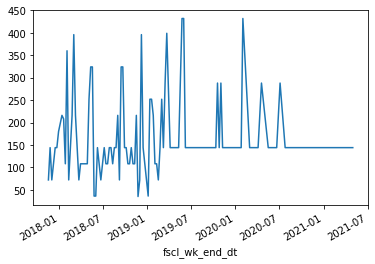

In [ ]:
#df[(df.item==210006122300) & (df.sold_to==100029534)]['location']#.drop_duplicates()#.set_index('fscl_wk_end_dt', inplace=True)
#210000623600 200250804
#[5688, 5418]
temp_df_1 = df[(df.item==210000623600) & (df.sold_to==200250804) & (df.location==5688)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210000623600) & (df.sold_to==200250804) & (df.location==5418)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot()
temp_df_2.delivery_quantity.plot()

In [ ]:
temp_df_1

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2017-11-18,210000623600,200250804,5688,72.000000000000000000,177.192000000000007276,112.463999999999998636,2017-11-18
2017-11-25,210000623600,200250804,5688,144.000000000000000000,354.384000000000014552,224.927999999999997272,2017-11-25
2017-12-02,210000623600,200250804,5688,72.000000000000000000,177.192000000000007276,112.463999999999998636,2017-12-02
2017-12-09,210000623600,200250804,5688,108.000000000000000000,265.788000000000010914,168.695999999999997954,2017-12-09
2017-12-16,210000623600,200250804,5688,144.000000000000000000,354.384000000000014552,224.927999999999997272,2017-12-16
...,...,...,...,...,...,...,...
2021-03-20,210000623600,200250804,5688,144.000000000000000000,354.089999999999974989,224.639999999999986358,2021-03-20
2021-03-27,210000623600,200250804,5688,144.000000000000000000,354.089999999999974989,224.639999999999986358,2021-03-27
2021-04-03,210000623600,200250804,5688,144.000000000000000000,354.089999999999974989,224.639999999999986358,2021-04-03


In [ ]:
temp_df_2

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2021-01-16,210000623600,200250804,5418,144.000000000000000000,354.089999999999974989,224.639999999999986358,2021-01-16


In [ ]:
temp_df_2.tail()

,item,sold_to,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date
fscl_wk_end_dt,,,,,,,
2021-01-16,210000623600,200250804,5418,144.000000000000000000,354.089999999999974989,224.639999999999986358,2021-01-16


In [ ]:
list(df[(df.item==210000001400) & (df.sold_to==100029534)]['location'].drop_duplicates())#.set_index('fscl_wk_end_dt', inplace=True)

[5688, 7531]

In [ ]:
#df[(df.item==210006122300) & (df.sold_to==100029534)]['location']#.drop_duplicates()#.set_index('fscl_wk_end_dt', inplace=True)
temp_df_3 = df[(df.item==210000001400) & (df.sold_to==100029534) & (df.location==5688)]
temp_df_3.set_index('fscl_wk_end_dt', inplace=True)

temp_df_4 = df[(df.item==210000001400) & (df.sold_to==100029534) & (df.location==7531)]
temp_df_4.set_index('fscl_wk_end_dt', inplace=True)

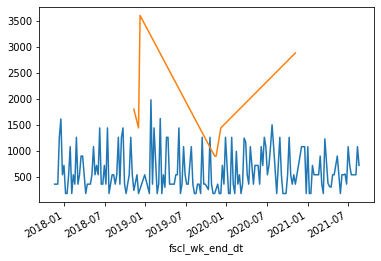

In [ ]:
temp_df_3.delivery_quantity.plot()
temp_df_4.delivery_quantity.plot()

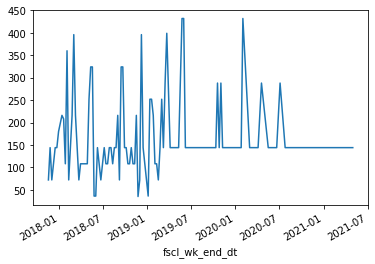

In [ ]:
temp_df_1.delivery_quantity.plot()
temp_df_2.delivery_quantity.plot()

In [ ]:
000000210000496900

In [ ]:
import ruptures as rpt

#Convert the time series values to a numpy 1D array
points1=np.array(temp_df_1['delivery_quantity'])
points2=np.array(temp_df_2['delivery_quantity'])
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo1 = rpt.Pelt(model=model).fit(points1)
algo2 = rpt.Pelt(model=model).fit(points2)
result1 = algo1.predict(pen=10)
result2 = algo2.predict(pen=10)
rpt.display(points1, result1, figsize=(10, 6))
rpt.display(points2, result2, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  
    
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo1 = rpt.Binseg(model=model).fit(points1)
algo2 = rpt.Binseg(model=model).fit(points2)
my_bkps1 = algo1.predict(n_bkps=10)
my_bkps2 = algo2.predict(n_bkps=10)
# show results
rpt.show.display(points1, my_bkps1, figsize=(10, 6))
rpt.show.display(points2, my_bkps2, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo1 = rpt.Window(width=40, model=model).fit(points1)
algo2 = rpt.Window(width=40, model=model).fit(points2)
my_bkps_1 = algo1.predict(n_bkps=10)
#my_bkps_2 = algo2.predict(n_bkps=10)
rpt.show.display(points1, my_bkps_1, figsize=(10, 6))
#rpt.show.display(points2, my_bkps_2, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo1 = rpt.Dynp(model=model, min_size=3, jump=5).fit(points1)
algo2 = rpt.Dynp(model=model, min_size=3, jump=5).fit(points2)
my_bkps1 = algo1.predict(n_bkps=10)
#my_bkps2 = algo2.predict(n_bkps=10)
rpt.show.display(points1, my_bkps1, figsize=(10, 6))
#rpt.show.display(points2, my_bkps2, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


BadSegmentationParameters: ignored